<a href="https://colab.research.google.com/github/dhruvmathur2001/Parkinson-Disease-Detection/blob/main/Official_Mini_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [ ]:
# Load the dataset
data = pd.read_csv("/content/parkinsons.csv")

In [ ]:
# Checking Presence of any Missing Value
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# Split data into features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])
y = data['status']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)

# Fit RFE to training data
rfe.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]

# Transform the training and testing data with selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

In [ ]:
selected_features.shape

(10,)

In [ ]:
selected_features

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'Jitter:DDP', 'MDVP:APQ', 'spread1', 'spread2', 'PPE'],
      dtype='object')

In [ ]:
X_train_selected

array([[-0.80172872, -0.70830513, -0.10603303, ...,  1.35367783,
         0.89854281,  1.64980971],
       [-1.04374224, -0.74950432, -0.29919921, ...,  0.37366749,
         1.17531845,  0.26864313],
       [-0.3790498 ,  0.13122544, -0.82039362, ...,  0.29714641,
        -0.7771489 ,  0.28542547],
       ...,
       [-0.13744368, -0.31583967,  0.56292775, ..., -0.18198275,
        -1.65126173, -0.17764131],
       [-0.14053505, -0.42034011,  0.39263744, ...,  0.03441697,
         0.19569946, -0.11105606],
       [-0.35427092,  4.57536567, -1.22354854, ...,  2.22823269,
         0.55494177,  2.57800238]])

In [ ]:
#SVM
# Initialize the SVM classifier
svm_classifier = SVC()

# Fit the classifier to the training data
svm_classifier.fit(X_train_selected, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test_selected)

# Evaluate the classifier performance
accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"SVM Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



SVM Accuracy: 0.8717948717948718
Precision: 0.8857142857142857
Recall: 0.96875
F1-score: 0.9253731343283582


In [ ]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=15)

# Fit the classifier to the training data
knn_classifier.fit(X_train_selected, y_train)

# Predict the labels for the test set
y_pred_knn = knn_classifier.predict(X_test_selected)

# Evaluate the classifier performance
accuracy = accuracy_score(y_test, y_pred_knn)

precision = precision_score(y_test, y_pred_knn)

recall = recall_score(y_test, y_pred_knn)

f1 = f1_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



KNN Accuracy: 0.8717948717948718
Precision: 0.8857142857142857
Recall: 0.96875
F1-score: 0.9253731343283582


In [ ]:
# prompt: Code to find accuracy with GaussianNBC method

# Create an instance of the GaussianNB classifier
GNB_classifier = GaussianNB()

# Train the GaussianNB classifier
GNB_classifier.fit(X_train_selected, y_train)

# Make predictions with the trained model
y_pred_GNB = GNB_classifier.predict(X_test_selected)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_GNB)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"Gaussian naive Baiyes Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Gaussian naive Baiyes Accuracy: 0.8461538461538461
Precision: 0.8857142857142857
Recall: 0.96875
F1-score: 0.9253731343283582


In [ ]:
# Initialize MLP classifier
mlp_classifier = MLPClassifier()

# Fit the classifier to the training data
mlp_classifier.fit(X_train_selected, y_train)

# Predict the labels for the test set
y_pred_mlp = mlp_classifier.predict(X_test_selected)

# Evaluate the MLP classifier performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"MLP Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

MLP Accuracy: 0.8461538461538461
Precision: 0.8857142857142857
Recall: 0.96875
F1-score: 0.9253731343283582


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_selected, y_train)

# Predict the labels for the test set
y_pred_rf = rf_classifier.predict(X_test_selected)

# Evaluate the Random Forest classifier performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"MLP Accuracy: {accuracy_rf}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

MLP Accuracy: 0.9230769230769231
Precision: 0.8857142857142857
Recall: 0.96875
F1-score: 0.9253731343283582


In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize base models
base_models = [
    SVC(probability=True, kernel='rbf', C=1.0),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB(),
    MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,), alpha=0.0001),

]

# Initialize meta model
meta_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Initialize k-fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize arrays to store meta-features
meta_features_train = np.zeros((len(y_train), len(base_models)))
meta_features_test = np.zeros((len(y_test), len(base_models)))

# Train base models with k-fold validation and grid search for hyperparameters
for i, model in enumerate(base_models):
    param_grid = {}  # Define the hyperparameter grid for grid search

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_

    # Train the best model on the entire training data
    best_model.fit(X_train_scaled, y_train)

    # Generate meta-features using the best model
    meta_features_train[:, i] = best_model.predict_proba(X_train_scaled)[:, 1]
    meta_features_test[:, i] = best_model.predict_proba(X_test_scaled)[:, 1]

# Train meta-model
meta_model.fit(meta_features_train, y_train)

# Make predictions using the stacked ensemble
stacked_predictions = meta_model.predict(meta_features_test)

# Evaluate stacked ensemble
accuracy = accuracy_score(y_test, stacked_predictions)
print(f"Stacked Ensemble Accuracy: {accuracy}")

Stacked Ensemble Accuracy: 0.9487179487179487


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [ ]:
conf_matrix = confusion_matrix(y_test, stacked_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 5  2]
 [ 0 32]]


In [ ]:
precision = precision_score(y_test, stacked_predictions)

recall = recall_score(y_test, stacked_predictions)

f1 = f1_score(y_test, stacked_predictions)

print(f"Stacked Ensemble Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Stacked Ensemble Accuracy: 0.9487179487179487
Precision: 0.9411764705882353
Recall: 1.0
F1-score: 0.9696969696969697


In [ ]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, stacked_predictions)
roc_auc = auc(fpr, tpr)

In [ ]:
roc_auc

0.8571428571428572

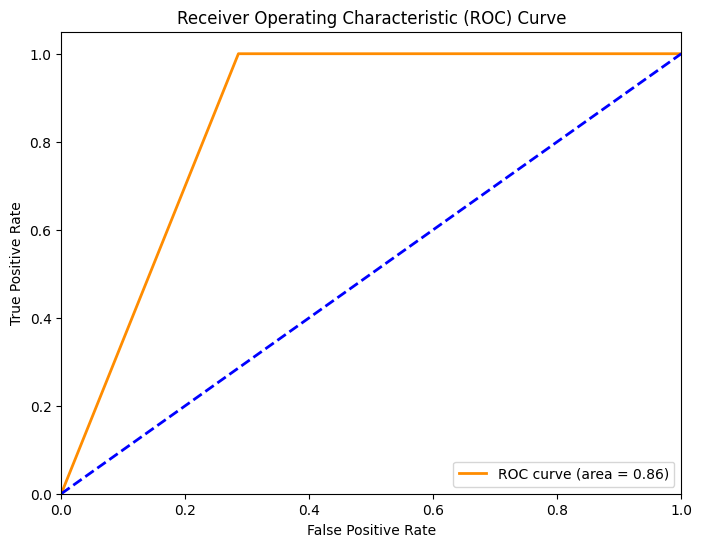

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


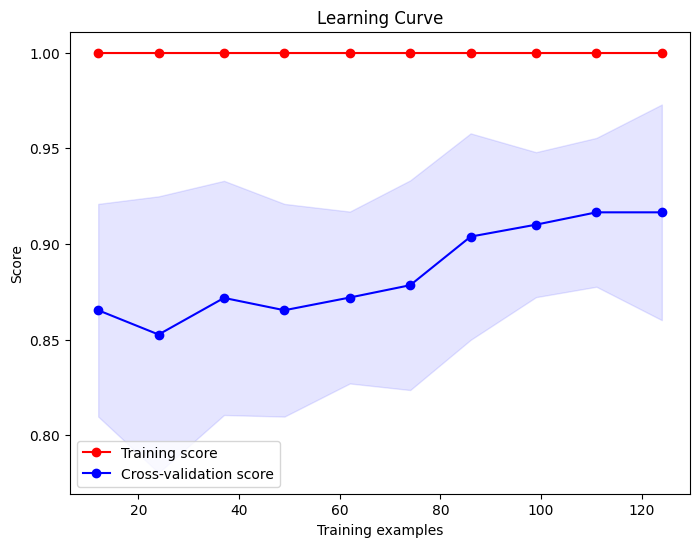

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(meta_model, X_train_selected, y_train, cv=kf,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="b")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

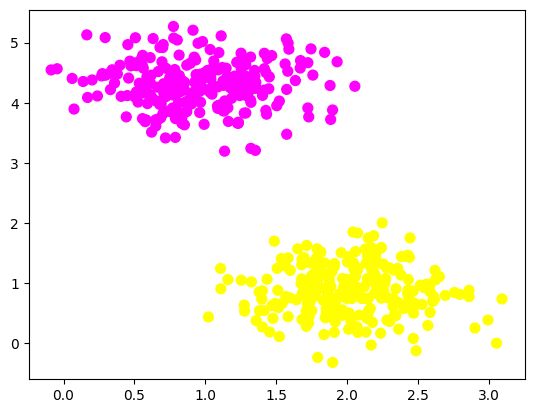

In [ ]:
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SVM classifier
clf = SVC(kernel='linear')

In [ ]:
# Train the SVM classifier
clf.fit(X_train, y_train)

# Make predictions with the trained model
predictions = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, stacked_predictions)
print("Confusion Matrix:")
print(conf_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [100, 39]

In [ ]:

import matplotlib.pyplot as plt

# Models and their performance metrics
models = ['Accuracy', 'Precision', 'F1 Score', 'Recall']
SVM = [0.871, 0.885, 0.925, 0.968]  # Example scores for SVM
KNN = [0.871, 0.885, 0.925, 0.968]  # Example scores for KNN
GNB = [0.846, 0.885, 0.925, 0.968]  # Example scores for GNB
MLP = [0.846, 0.885, 0.925, 0.968]  # Example scores for MLP
RF = [0.923, 0.885, 0.925, 0.968]  # Example scores for Random Forest
Stacked_Ensemble = [0.948, 0.941, 0.969, 1.0]  # Example scores for Stacked Ensemble

# Set the width of the bars
bar_width = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Plotting the bars
plt.figure(figsize=(12, 8))
plt.bar(r1, SVM, color='b', width=bar_width, edgecolor='grey', label='SVM')
plt.bar(r2, KNN, color='g', width=bar_width, edgecolor='grey', label='KNN')
plt.bar(r3, GNB, color='orange', width=bar_width, edgecolor='grey', label='GNB')
plt.bar(r4, MLP, color='r', width=bar_width, edgecolor='grey', label='MLP')
plt.bar(r5, RF, color='cyan', width=bar_width, edgecolor='grey', label='Random Forest')
plt.bar(r6, Stacked_Ensemble, color='purple', width=bar_width, edgecolor='grey', label='Stacked Ensemble')

# Adding labels and title
plt.xlabel('Performance Metrics', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics Comparison', fontweight='bold')

# Adding xticks
plt.xticks([r + 2.5 * bar_width for r in range(len(models))], models)

# Show plot
plt.ylim(0, 1)  # Set y-axis limits to range from 0 to 1
plt.grid(axis='y')  # Add gridlines only on the y-axis

# Create a separate legend above the graph
plt.legend(['SVM', 'KNN', 'GNB', 'MLP', 'Random Forest', 'Stacked Ensemble'], loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=True, ncol=6)

plt.show()
